# Import Original Data

In [1]:
import pandas as pd
df = pd.read_csv('data.csv')

In [2]:
df

,WBRatio,OPC,PPC,DAYS,CO2,STRENGTH
0,0.45,400,0,7,0.00,22.57
1,0.45,400,0,7,0.00,29.51
2,0.45,400,0,7,0.00,20.66
3,0.45,400,0,7,0.05,25.30
4,0.45,400,0,7,0.05,24.03
...,...,...,...,...,...,...
265,0.55,0,350,56,0.15,29.66
266,0.55,0,350,56,0.15,29.71
267,0.55,0,350,56,0.20,27.44
268,0.55,0,350,56,0.20,31.58


In [3]:
from pycaret.regression import *

# prompt: Use Darts to predict Strength
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df.drop('STRENGTH', axis=1)
y = df['STRENGTH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a PyCaret regression experiment
# Added index=False to avoid issues with duplicate indices
reg_exp = setup(data=df, target='STRENGTH', session_id=123)

# Predict on unseen data (if you have any)
# predictions = predict_model(tuned_best_model, data=unseen_data)

,Description,Value
0,Session id,123
1,Target,STRENGTH
2,Target type,Regression
3,Original data shape,"(270, 6)"
4,Transformed data shape,"(270, 6)"
5,Transformed train set shape,"(189, 6)"
6,Transformed test set shape,"(81, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [4]:
# Compare different regression models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,2.5954,10.2305,3.1579,0.9356,0.0908,0.0774,0.0340
gbr,Gradient Boosting Regressor,2.6934,11.1376,3.2865,0.9299,0.0931,0.0801,0.0050
rf,Random Forest Regressor,2.8967,12.5034,3.5157,0.9216,0.1004,0.0863,0.0160
knn,K Neighbors Regressor,2.9203,13.2217,3.5510,0.9171,0.0992,0.0855,0.0060
ada,AdaBoost Regressor,3.0062,14.9344,3.7472,0.9079,0.1051,0.0886,0.0040
et,Extra Trees Regressor,3.1587,15.0855,3.8622,0.9049,0.1114,0.0946,0.0120
xgboost,Extreme Gradient Boosting,3.2000,15.1649,3.8744,0.9042,0.1123,0.0961,0.0070
dt,Decision Tree Regressor,3.2426,15.8827,3.9587,0.9003,0.1138,0.0975,0.0020
lar,Least Angle Regression,4.7495,33.4201,5.7305,0.7850,0.1620,0.1412,0.0040
lr,Linear Regression,4.7495,33.4201,5.7305,0.7850,0.1620,0.1412,0.1870


In [5]:
# Tune the best model
tuned_best_model = tune_model(best_model)

# Evaluate the tuned model
evaluate_model(tuned_best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3266,8.6447,2.9402,0.9347,0.0912,0.0764
1,2.2865,9.4981,3.0819,0.9505,0.0815,0.0642
2,3.3892,16.4265,4.0530,0.8932,0.0951,0.0846
3,2.5935,9.0449,3.0075,0.9459,0.1134,0.1011
4,2.3642,10.2574,3.2027,0.9182,0.0879,0.0646
5,2.9756,13.2263,3.6368,0.9194,0.1278,0.1050
6,2.7233,9.9209,3.1498,0.9501,0.0995,0.0829
7,2.2277,7.1240,2.6691,0.9496,0.0701,0.0585
8,2.1299,6.9059,2.6279,0.9497,0.0780,0.0658


Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

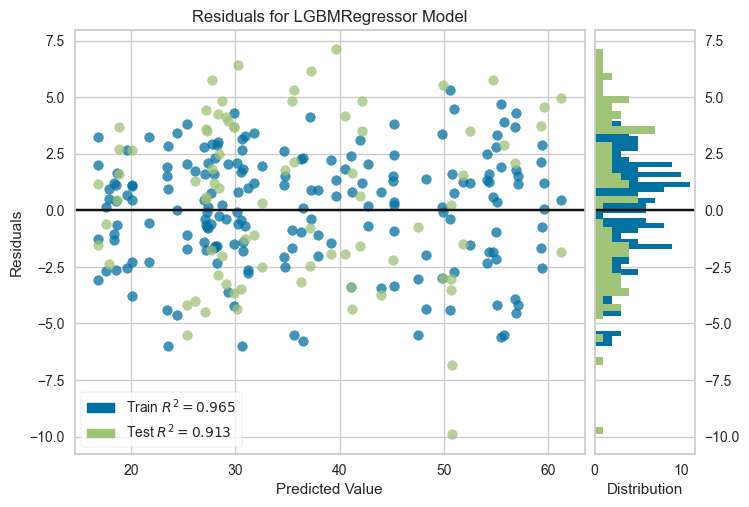

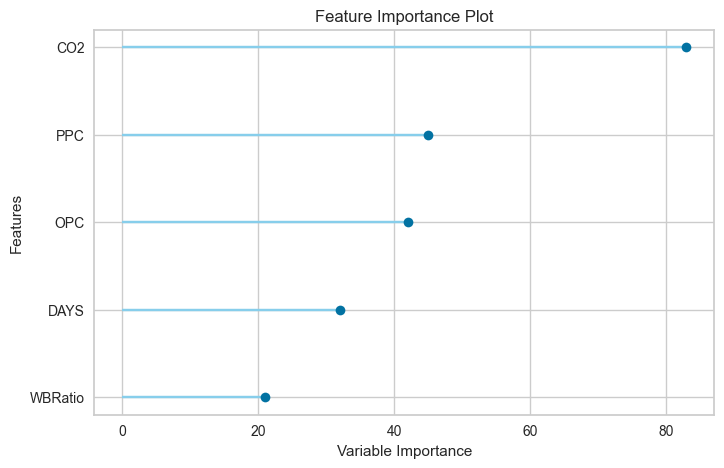

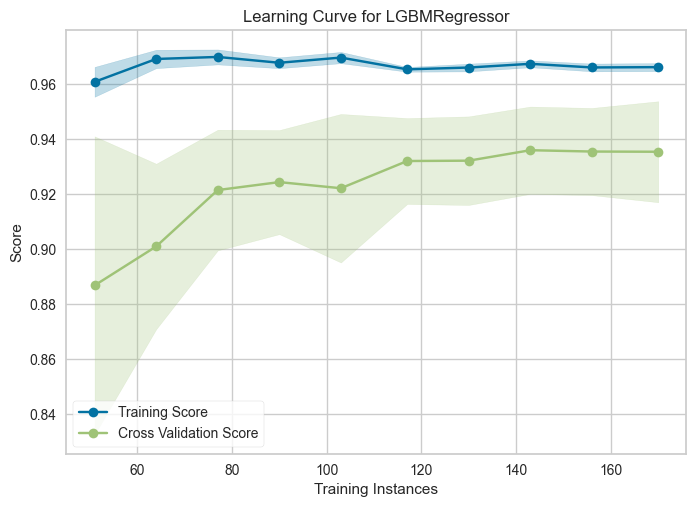

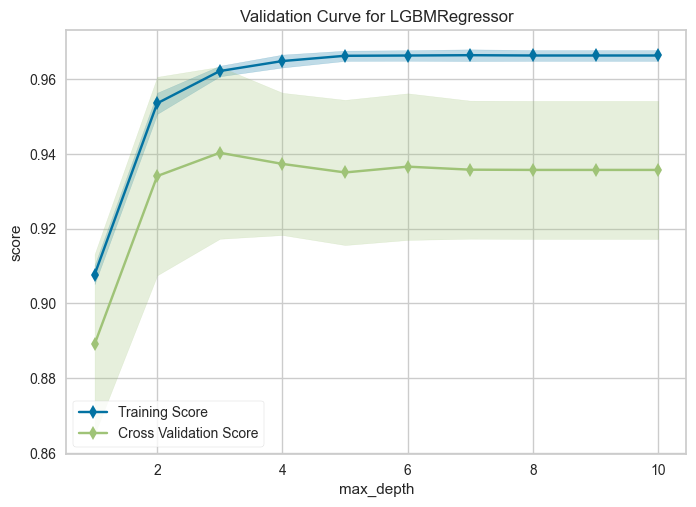

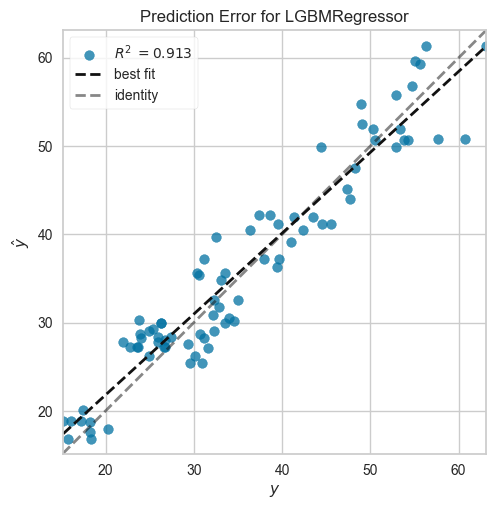

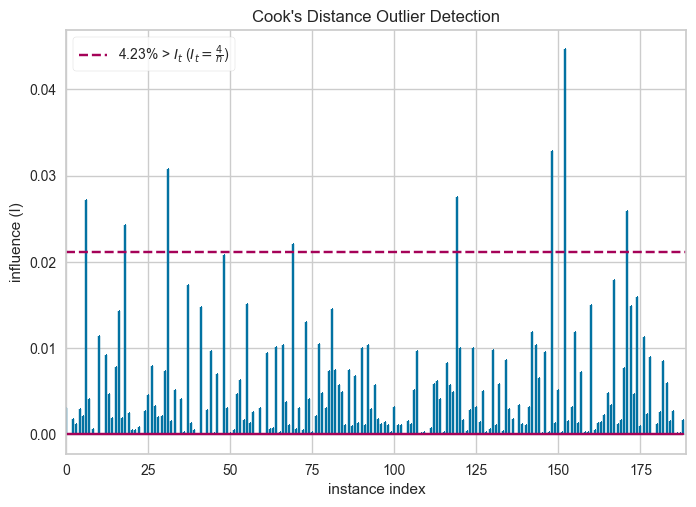

In [7]:
import matplotlib.pyplot as plt
from pycaret.regression import *

# Assuming you've already set up your environment and trained the model
# setup(data=refined_combined_data, target='STRENGTH')  # Uncomment if setup is not done
# model = create_model('lightgbm')  # Your trained model

# List of available plot types in PyCaret for regression models
plot_types = [
    'residuals', 'feature', 'learning', 'vc', 
    'error', 'cooks']

# Loop through each plot type and save it
for plot_type in plot_types:
    # Generate the plot
    plot_model(tuned_best_model, plot=plot_type)

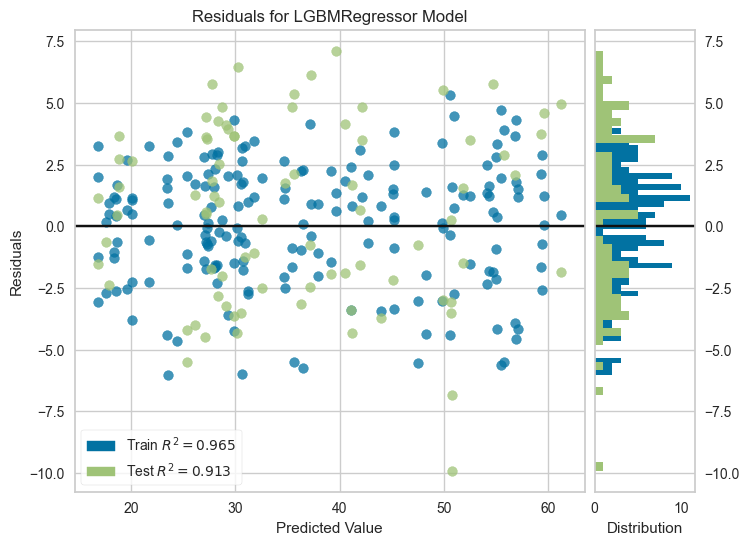

<Figure size 800x600 with 0 Axes>

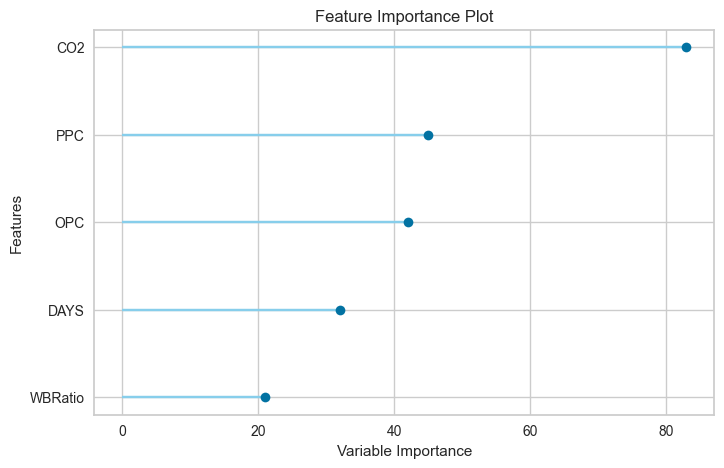

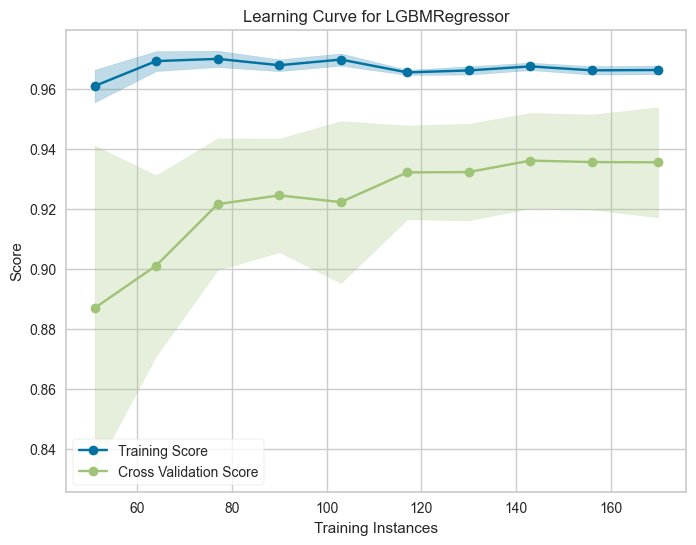

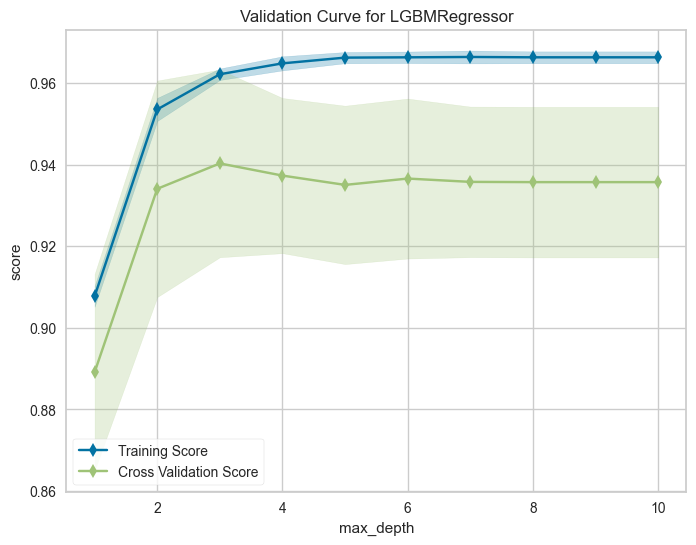

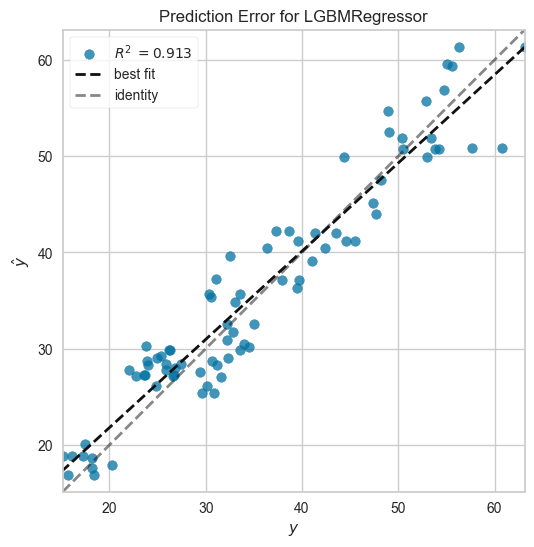

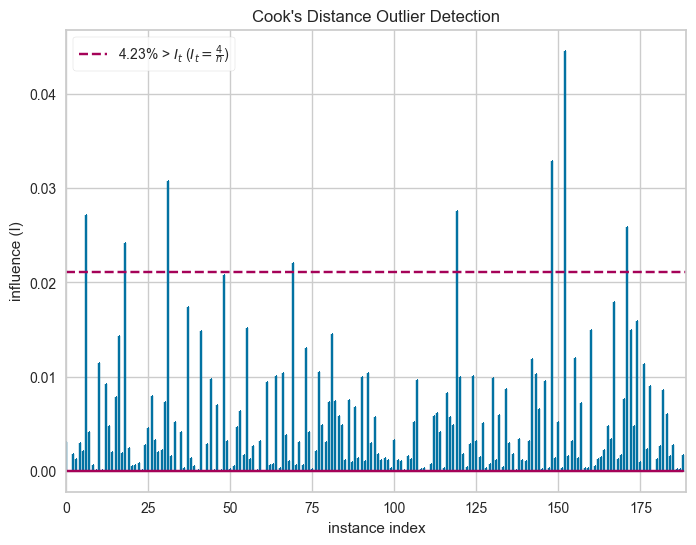

In [19]:
import matplotlib.pyplot as plt
from pycaret.regression import *

# Assuming you've already set up your environment and trained the model
# setup(data=refined_combined_data, target='STRENGTH')  # Uncomment if setup is not done
# tuned_best_model = create_model('lightgbm')  # Your trained model

# List of available plot types in PyCaret for regression models
plot_types = [
    'residuals', 'feature', 'learning', 'vc', 
    'error', 'cooks'
]

# Define a consistent figure size
fig_width = 8  # Width in inches
fig_height = 6  # Height in inches

# Loop through each plot type and save it
for plot_type in plot_types:
    plt.figure(figsize=(fig_width, fig_height))  # Set consistent figure size
    plot_model(tuned_best_model, plot=plot_type)
    plt.show()  # Display the plot (optional)


In [8]:
from pycaret.regression import *

# Assuming the environment is set up, and the model is trained
# setup(data=refined_combined_data, target='STRENGTH')  # Uncomment if setup is not done
# model = create_model('lightgbm')  # Replace with your trained model

# List of available plot types
plot_types = [
    'residuals', 'feature', 'learning', 'vc', 
    'error', 'cooks']

# Save each plot
for plot_type in plot_types:
    # Generate and save the plot
    plot_model(tuned_best_model, plot=plot_type, save=True)

In [10]:
X = df.drop(columns=['STRENGTH'])  # Replace 'target_column' with your target feature name

In [11]:
import shap

# Initialize SHAP Explainer
explainer = shap.Explainer(best_model.predict, X)
shap_values = explainer(X)

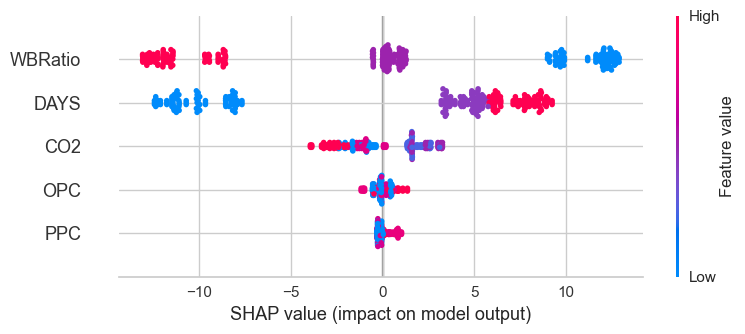

In [12]:
shap.summary_plot(shap_values, X)

In [13]:
import shap
import matplotlib.pyplot as plt

# Assuming `shap_values` and `X` are already defined
# Generate the summary plot
plt.figure()  # Create a new figure
shap.summary_plot(shap_values, X, show=False)  # `show=False` prevents it from displaying

# Save the plot as a PDF with high resolution
plt.savefig("shap_summary_plot.pdf", format="pdf", dpi=1200)

# Close the plot to free memory
plt.close()

In [14]:
shap.initjs()

In [15]:
# Force plot for the first prediction
shap.force_plot(
    shap_values.base_values[0],  # Base value of the model's output
    shap_values.values[0],       # SHAP values for the first row
    X.iloc[0, :]                 # Feature values for the first row
)

In [16]:
force_plot = shap.force_plot(
    shap_values.base_values[0],
    shap_values.values[0],
    X.iloc[0, :]
)

# Save the plot as an HTML file
shap.save_html('force_plot.html', force_plot)

In [17]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values and X are already defined
# Generate the force plot for the first prediction
force_plot = shap.force_plot(
    shap_values.base_values[0],  # Base value of the model's output
    shap_values.values[0],       # SHAP values for the first row
    X.iloc[0, :]                 # Feature values for the first row
)

# Save the force plot as a PDF
# First, we use `shap.save_html` to save it as an HTML file
shap.save_html("force_plot.html", force_plot)

# Then, we can use a library like `pdfkit` to convert the HTML to PDF, or use Matplotlib to save it as an image.
# To directly save it as a PDF, we will use the html2pdf approach:

import pdfkit
pdfkit.from_file("force_plot.html", "force_plot.pdf")

# The force plot is now saved as 'force_plot.pdf'

True

# END